In [1]:
import pandas as pd 
import numpy as np
from pathlib import Path

In [2]:
raw = Path("../data/raw/data_base.csv")
sample = Path("../data/sample/sample.csv")

In [3]:
path = raw if raw.exists() else sample

In [4]:
df = pd.read_csv(path)
df

,id_post,date,text,views,reactions,comments
0,14381,2026-02-02 13:31:57+00:00,Меню «Пуск» в Windows 11 [превратили](https://...,74536,1064,0
1,14380,2026-02-02 10:49:42+00:00,В Москве робота заметили за уборкой снега. \n\...,110566,1442,0
2,14376,2026-02-02 10:01:14+00:00,В Steam вышел хоррор The 18th Attic — в нем ну...,104438,675,0
3,14374,2026-02-02 07:14:58+00:00,Бот Openclaw (он же Clawdbot) сливает данные с...,124727,937,0
4,14373,2026-02-01 14:05:02+00:00,⚡️ Разыгрываем MacBook Pro M5 и поход в баню с...,156150,1960,0
...,...,...,...,...,...,...
3346,8090,2024-09-23 15:31:18+00:00,Дома из Lego не за горами: инженеры из MIT [ра...,195664,983,0
3347,8088,2024-09-23 13:40:06+00:00,Telegram будет передавать IP-адреса и номера т...,214666,2747,0
3348,8087,2024-09-23 13:05:23+00:00,Цифра дня: 3601 химикат из продуктовых упаково...,202142,1026,0
3349,8086,2024-09-23 11:32:23+00:00,Ученые [создали](https://www.tomshardware.com/...,199894,3238,0


In [5]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,id_post,date,text,views,reactions,comments
0,14381,2026-02-02 13:31:57+00:00,Меню «Пуск» в Windows 11 [превратили](https://...,74536,1064,0
1,14380,2026-02-02 10:49:42+00:00,В Москве робота заметили за уборкой снега. \n\...,110566,1442,0
2,14376,2026-02-02 10:01:14+00:00,В Steam вышел хоррор The 18th Attic — в нем ну...,104438,675,0
3,14374,2026-02-02 07:14:58+00:00,Бот Openclaw (он же Clawdbot) сливает данные с...,124727,937,0
4,14373,2026-02-01 14:05:02+00:00,⚡️ Разыгрываем MacBook Pro M5 и поход в баню с...,156150,1960,0


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   id_post    3351 non-null   int64              
 1   date       3351 non-null   datetime64[us, UTC]
 2   text       3351 non-null   str                
 3   views      3351 non-null   int64              
 4   reactions  3351 non-null   int64              
 5   comments   3351 non-null   int64              
dtypes: datetime64[us, UTC](1), int64(4), str(1)
memory usage: 157.2 KB


In [7]:
df["text_len"] = df["text"].astype(str).str.len()

In [8]:
# создаем колонку с часом, когда выложен пост
df["hour"] = df["date"].dt.hour
# создаем колонку с днем недели, когда выложен пост
df["week_day"] = df["date"].dt.day_name()


In [9]:
df.head(6)

,id_post,date,text,views,reactions,comments,text_len,hour,week_day
0,14381,2026-02-02 13:31:57+00:00,Меню «Пуск» в Windows 11 [превратили](https://...,74536,1064,0,434,13,Monday
1,14380,2026-02-02 10:49:42+00:00,В Москве робота заметили за уборкой снега. \n\...,110566,1442,0,112,10,Monday
2,14376,2026-02-02 10:01:14+00:00,В Steam вышел хоррор The 18th Attic — в нем ну...,104438,675,0,519,10,Monday
3,14374,2026-02-02 07:14:58+00:00,Бот Openclaw (он же Clawdbot) сливает данные с...,124727,937,0,491,7,Monday
4,14373,2026-02-01 14:05:02+00:00,⚡️ Разыгрываем MacBook Pro M5 и поход в баню с...,156150,1960,0,421,14,Sunday
5,14372,2026-02-01 13:35:53+00:00,**Мне 26 и я вложил $1 МЛН в тг-канал (хотел з...,124240,782,0,263,13,Sunday


In [10]:
df[["views", "reactions", "comments", "text_len"]].describe().T


,count,mean,std,min,25%,50%,75%,max
views,3351.0,223469.033423,52243.489301,74536.0,183124.0,215236.0,256757.0,488143.0
reactions,3351.0,1680.980603,1313.048271,0.0,891.5,1412.0,2151.0,45803.0
comments,3351.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
text_len,3351.0,443.884811,220.925012,47.0,338.0,406.0,500.0,3913.0


In [11]:
df.shape

(3351, 9)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

**Распределение публикаций по часам суток**

C:\Users\Arina\AppData\Local\Temp\ipykernel_2072\1643752989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['hour'], data=df, palette='twilight')


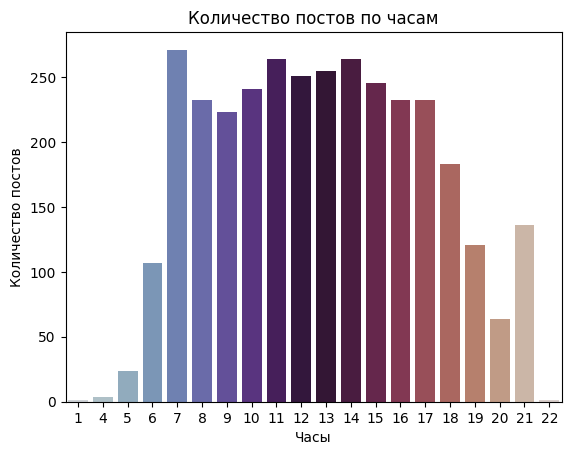

In [13]:
# построим зависимость количества постов от времени суток
sns.countplot(x=df['hour'], data=df, palette='twilight')
plt.xlabel('Часы')
plt.ylabel('Количество постов')
plt.title('Количество постов по часам')
plt.show()

Видны часы максимальной публикационной активности

**Распределение публикаций по дням недели**
Исследуем в какие дни публикации выставляются чаще/реже (проверка регулярности контента)

C:\Users\Arina\AppData\Local\Temp\ipykernel_2072\2378123919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['week_day'], data=df, palette='summer', order=days)


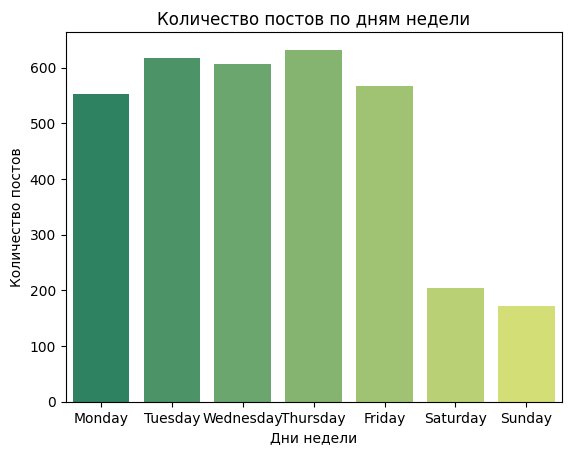

In [14]:
# посмотрим зависимость количества постов от дня недели

# для нормального отображения дней недели
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(x=df['week_day'], data=df, palette='summer', order=days)
plt.xlabel('Дни недели')
plt.ylabel('Количество постов')
plt.title('Количество постов по дням недели')
plt.show()

**Динамика числа публикаций по дням**

In [15]:
import plotly.express as px

In [16]:
df["day"] = df["date"].dt.date
df["day"] = pd.to_datetime(df["day"])

In [17]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   id_post    3351 non-null   int64              
 1   date       3351 non-null   datetime64[us, UTC]
 2   text       3351 non-null   str                
 3   views      3351 non-null   int64              
 4   reactions  3351 non-null   int64              
 5   comments   3351 non-null   int64              
 6   text_len   3351 non-null   int64              
 7   hour       3351 non-null   int32              
 8   week_day   3351 non-null   str                
 9   day        3351 non-null   datetime64[s]      
dtypes: datetime64[s](1), datetime64[us, UTC](1), int32(1), int64(5), str(2)
memory usage: 248.8 KB


Посмотрим на количество публикаций за каждый день

In [18]:
# считаем количество постов за каждый день
posts_count = df['day'].value_counts().sort_index().reset_index()

posts_count.columns = ['day', 'count']

In [19]:
# проверочка
posts_count.max()

day      2026-02-02 00:00:00
count                     14
dtype: object

In [20]:
posts_count

,day,count
0,2024-09-23,8
1,2024-09-24,8
2,2024-09-25,10
3,2024-09-26,10
4,2024-09-27,9
...,...,...
491,2026-01-29,10
492,2026-01-30,11
493,2026-01-31,5
494,2026-02-01,7


In [21]:
# построение графика
fig = px.line(posts_count, x='day', y='count', title='Динамика публикаций по дням').update_layout(
    xaxis_title='Дата', yaxis_title='Количество публикаций')
fig.show()

In [22]:
daily = df.groupby("day")[["views", "reactions"]].median().reset_index()

daily.head()

,day,views,reactions
0,2024-09-23,201154.5,1505.0
1,2024-09-24,197781.0,1793.5
2,2024-09-25,188308.0,1097.5
3,2024-09-26,193217.0,1422.0
4,2024-09-27,194672.0,1315.0


**Динамика типичных просмотров по дням**

In [23]:
fig = px.line(daily, x="day", y="views", title="Типичные просмотры по дням")
fig.show()

**Распределения просмотров и реакций**

In [24]:
fig = px.histogram(df, x="views", nbins=50, title="Распределение просмотров")
fig.update_layout(xaxis_title="Просмотры", yaxis_title="Количество постов")
fig.update_yaxes(type="log")
fig.show()

fig = px.histogram(df, x="reactions", nbins=50, title="Распределение реакций")
fig.update_layout(xaxis_title="Реакции", yaxis_title="Количество постов")
fig.update_yaxes(type="log")
fig.show()

**Рассмотрим связь просмотров и реакций по каждому посту через час публикаций**

In [25]:
df2 = df.copy()
df2 = df2[(df2["views"] > 0) & (df2["reactions"] > 0)]

In [26]:
df["log_views"] = np.log10(df2["views"])
df["log_reactions"] = np.log10(df2["reactions"])

In [27]:
fig = px.scatter(
    df, x="log_views", y="log_reactions",
    color="hour",
    title="Просмотры vs Реакции (по часам)"
)
fig.show()

Наблюдаем положительную зависимость, то есть при росте просмотров растет и количество реакций.

**Распределение вовлечённости**

In [28]:
df["engagement"] = (df["reactions"] / df["views"]).where(df["views"] > 0)
df["engagement"].describe()

count    3351.000000
mean        0.007431
std         0.006488
min         0.000000
25%         0.004220
50%         0.006440
75%         0.009592
max         0.302003
Name: engagement, dtype: float64

In [29]:
fig = px.histogram(df.dropna(subset=["engagement"]), x="engagement", nbins=60,
                   title="Распределение вовлеченности")
fig.update_layout(xaxis_title="Engagement", yaxis_title="Количество постов")
fig.show()

**Heatmap активности публикаций по дням недели и часам**

In [30]:
tmp = df.copy()
tmp["week_day"] = pd.Categorical(tmp["week_day"], categories=days, ordered=True)

In [31]:
pivot = tmp.pivot_table(index="week_day", columns="hour", values="engagement", aggfunc="median")

In [32]:
fig = px.imshow(pivot, aspect="auto", title="Активность публикаций по дням недели и часам")
fig.update_layout(xaxis_title="Час", yaxis_title="День недели")
fig.show()

У большинства постов вовлечённость низкая, есть редкие посты с высокой долей реакций

**Топ постов**

In [33]:
top_views = df.sort_values("views", ascending=False).head(10)[["date","views","reactions","engagement","text"]]
top_reactions = df.sort_values("reactions", ascending=False).head(10)[["date","views","reactions","engagement","text"]]
top_eng = df.sort_values("engagement", ascending=False).head(10)[["date","views","reactions","engagement","text"]]

top_views


,date,views,reactions,engagement,text
2581,2025-01-14 14:21:10+00:00,488143,5247,0.010749,"⚡️ В рунете масштабный сбой, не открываются да..."
2551,2025-01-19 07:47:19+00:00,429765,4229,0.009840,TikTok все-таки [заблокировали](https://editio...
2307,2025-03-01 09:37:13+00:00,422356,3540,0.008382,На Госуслугах появился **самозапрет на кредиты...
2550,2025-01-19 19:02:56+00:00,418492,5291,0.012643,TikTok снова [заработал](https://x.com/tiktokp...
2623,2025-01-03 16:35:40+00:00,411132,3624,0.008815,Парень решил избавиться от головной боли и улу...
2593,2025-01-12 09:15:24+00:00,402010,5708,0.014199,Звезда женского NBA [ушла](https://tribune.com...
2459,2025-02-04 07:32:10+00:00,399202,2321,0.005814,"Студенты, ваш день: вышел бесплатный аналог De..."
2552,2025-01-18 13:04:16+00:00,391894,2950,0.007528,Мемкоин Дональда Трампа меньше чем за день выр...
2553,2025-01-18 11:25:33+00:00,387707,3127,0.008065,Работа мечты: тестировщик одеял за ₽200 тыс. в...
2631,2025-01-01 14:45:15+00:00,387455,5689,0.014683,"Mr. Beast заплатит двум пилотам $100 млн, если..."
